# **Telecom Customer Churn Prediction**

## Explore Data

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read dataset
df = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/TelecomCustomerChurn.csv')

In [3]:
df.head()

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Monthly,Yes,Manual,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Manual,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Monthly,Yes,Manual,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Monthly,Yes,Manual,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,Tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.isna().sum()

customerID          0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.shape

(7043, 21)

In [8]:
df.columns

Index(['customerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
# define y and X
y = df['Churn']
X = df.drop(['customerID','Churn'],axis=1)

In [11]:
y.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

## handle the imbalance of the data

In [12]:
# sample oversampling
from imblearn.over_sampling import RandomOverSampler

In [13]:
ros = RandomOverSampler()

In [14]:
X,y = ros.fit_resample(X,y)

In [15]:
y.value_counts()

Churn
No     5174
Yes    5174
Name: count, dtype: int64

In [ ]:
y

In [17]:
# ordinal encoding
from sklearn.preprocessing import OrdinalEncoder

In [18]:
oe = OrdinalEncoder()

In [19]:
X = oe.fit_transform(X)

## Testing with Multiple Model on cross validation

### Library and Data Spliting

In [36]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, cross_val_score, KFold
import numpy as np

In [42]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

### Define Model

In [ ]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC()
}
results = []

### Train, cross-validate, predict, and evaluate

In [ ]:
for name, model in models.items():
    print(f"\n🔍 Evaluating: {name}")
    
    # Cross-validation (on training set only)
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
    print(f"🧪 Cross-validation Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")
    
    # Train the model on the full training set
    model.fit(X_train, y_train)
    
    # Predict and report on the test set
    y_pred = model.predict(X_test)
    results.append(cv_scores)
    print("📊 Classification Report on Test Set:")
    print(classification_report(y_test, y_pred))



🔍 Evaluating: Random Forest
🧪 Cross-validation Accuracy: 0.8654 ± 0.0106
📊 Classification Report on Test Set:
              precision    recall  f1-score   support

          No       0.93      0.85      0.89      1298
         Yes       0.86      0.93      0.90      1289

    accuracy                           0.89      2587
   macro avg       0.90      0.89      0.89      2587
weighted avg       0.90      0.89      0.89      2587


🔍 Evaluating: Gradient Boosting
🧪 Cross-validation Accuracy: 0.7801 ± 0.0128
📊 Classification Report on Test Set:
              precision    recall  f1-score   support

          No       0.81      0.75      0.78      1298
         Yes       0.77      0.83      0.80      1289

    accuracy                           0.79      2587
   macro avg       0.79      0.79      0.79      2587
weighted avg       0.79      0.79      0.79      2587


🔍 Evaluating: Logistic Regression


c:\Users\kmeanhor\AppData\Local\anaconda3\envs\meanhorkea\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\kmeanhor\AppData\Local\anaconda3\envs\meanhorkea\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.

🧪 Cross-validation Accuracy: 0.7633 ± 0.0103


c:\Users\kmeanhor\AppData\Local\anaconda3\envs\meanhorkea\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


📊 Classification Report on Test Set:
              precision    recall  f1-score   support

          No       0.79      0.76      0.77      1298
         Yes       0.76      0.79      0.78      1289

    accuracy                           0.77      2587
   macro avg       0.78      0.77      0.77      2587
weighted avg       0.78      0.77      0.77      2587


🔍 Evaluating: Decision Tree
🧪 Cross-validation Accuracy: 0.8374 ± 0.0071
📊 Classification Report on Test Set:
              precision    recall  f1-score   support

          No       0.91      0.79      0.85      1298
         Yes       0.81      0.92      0.86      1289

    accuracy                           0.85      2587
   macro avg       0.86      0.85      0.85      2587
weighted avg       0.86      0.85      0.85      2587


🔍 Evaluating: SVM
🧪 Cross-validation Accuracy: 0.6281 ± 0.0082
📊 Classification Report on Test Set:
              precision    recall  f1-score   support

          No       0.70      0.54      0.6

### Visualize the Model Performace

C:\Users\kmeanhor\AppData\Local\Temp\ipykernel_17448\956938454.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results, labels=models.keys())


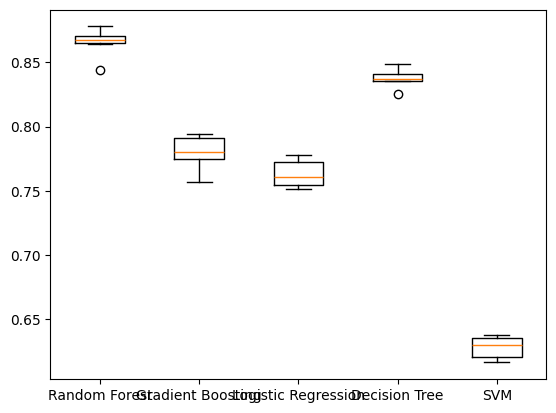

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot(results, labels=models.keys())
plt.title("Cross-Validation Accuracies")
plt.ylabel("Accuracy")
plt.show()

**As the result we see that:**

### Result Array

In [46]:
results

[array([0.86785162, 0.86398764, 0.87789799, 0.84377417, 0.86697602,
        0.8716164 ]),
 array([0.79443586, 0.7797527 , 0.79443586, 0.7733952 , 0.75715391,
        0.78112916]),
 array([0.77820711, 0.76043277, 0.76120556, 0.75174014, 0.75251353,
        0.77571539]),
 array([0.83539413, 0.83848532, 0.84853168, 0.82521268, 0.84145398,
        0.83526682]),
 array([0.63214838, 0.63755796, 0.63678516, 0.62722351, 0.61639598,
        0.61871616])]

## GridSearchCV

In [47]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Define models and their parameter grids
model_params = {
    "Random Forest": {
        "model": RandomForestClassifier(),
        "params": {
            "n_estimators": [50, 100],
            "max_depth": [None, 10, 20]
        }
    },
    "Gradient Boosting": {
        "model": GradientBoostingClassifier(),
        "params": {
            "n_estimators": [50, 100],
            "learning_rate": [0.01, 0.1],
            "max_depth": [3, 5]
        }
    },
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=1000),
        "params": {
            "C": [0.1, 1, 10],
            "solver": ['lbfgs', 'liblinear']
        }
    },
    "Decision Tree": {
        "model": DecisionTreeClassifier(),
        "params": {
            "max_depth": [None, 10, 20],
            "criterion": ["gini", "entropy"]
        }
    },
    "SVM": {
        "model": SVC(),
        "params": {
            "C": [0.1, 1, 10],
            "kernel": ["linear", "rbf"]
        }
    }
}

results = []

for name, mp in model_params.items():
    print(f"\n🔍 Grid Search for: {name}")
    
    grid = GridSearchCV(mp["model"], mp["params"], cv=6, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)
    
    print(f"✅ Best Parameters: {grid.best_params_}")
    print(f"🧪 Best CV Accuracy: {grid.best_score_:.4f}")
    
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    
    print("📊 Classification Report on Test Set:")
    print(classification_report(y_test, y_pred))
    
    results.append(grid.cv_results_['mean_test_score'])

# Plotting
plt.boxplot(results, labels=model_params.keys())
plt.title("Cross-Validation Accuracies from GridSearchCV")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


🔍 Grid Search for: Random Forest
✅ Best Parameters: {'max_depth': None, 'n_estimators': 50}
🧪 Best CV Accuracy: 0.8728
📊 Classification Report on Test Set:
              precision    recall  f1-score   support

          No       0.93      0.86      0.89      1298
         Yes       0.87      0.94      0.90      1289

    accuracy                           0.90      2587
   macro avg       0.90      0.90      0.90      2587
weighted avg       0.90      0.90      0.90      2587


🔍 Grid Search for: Gradient Boosting
✅ Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
🧪 Best CV Accuracy: 0.8093
📊 Classification Report on Test Set:
              precision    recall  f1-score   support

          No       0.86      0.77      0.81      1298
         Yes       0.79      0.88      0.83      1289

    accuracy                           0.82      2587
   macro avg       0.83      0.82      0.82      2587
weighted avg       0.83      0.82      0.82      2587


🔍 Grid 

KeyboardInterrupt: 

## Testing new Model

### Library 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier